<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe2-MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento de datos**

**Entrada:** El programa recibe una secuencia de $n$ números arreglo en un orden aleatoria de la manera $[a_1, a_2, ..., a_n,]$.

**Salida:** El programa retorna la secuencia de $n$ números en un orden establecido de la manera $[a_1' \leq a_2'\leq ...,\leq a_n']$.

### Ejemplo

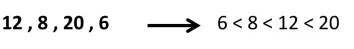

El problema del ordenamiento ha atraído gran cantidad de investigación desde los comienzos de la computación, atracción que perdura hasta hoy, tal vez debido a que, pese a su simple y familiar planteamiento, la complejidad que presenta de resolverlo eficientemente. Por ejemplo, el método de ordenamiento conocido como $Merge Sort$, un algoritmo de ordenamiento  que se ejecuta de forma recursiva.

# **2. Merge Sort**

## **2.1. Descripción del algoritmo**

`Merge Sort` es uno de los algoritmos que solucionan el problema de ordenamiento de forma recursiva. Además, tiene la peculiaridad de que el peor y el mejor casos son del mismo orden.

El algoritmo recibe de entrada una lista(o arreglo) $arr$ con una secuencia de $n$ números en cualquier orden. 

Luego los números dentro de la lista(o arreglo) se ordenan de mayor a menor o de menor a mayor dependiendo del programador. En este caso describiremos el algoritmo al ordenar de menor a mayor

1.   En cada interacción i del Merge Sort, se calculará la mitad del arreglo para dividirlo en dos sub-arreglos, que se enviaran a la función Merge Sort para ordenar los sub-arreglos de menor a mayor.
2.   Luego de que Merge Sort ordene los sub-arreglos, se enviaran a la función Merge que juntara todos los elementos de ambos sub-arreglos en un único arreglo ordenado.
3.   Esto sucede en cada iteración del algoritmo, se puede evidenciar que es recursivo. El algoritmo Merge Sort ordenara el arreglo recibido, la función Merge siempre recibirá dos sub-arreglos ordenados e integrara los elementos de ambos en un único arreglo de forma ordenada.
4.   El algoritmo ordena el arreglo y retorna la cantidad de interacciones en el algoritmo.

## **2.2. Código**

In [68]:
import random
from termcolor import colored
import copy

llamadas = -1; contador = 0; pasada = 0; llamadasMerge = 0

def subArreglo(a,i):
    if len(a) == 1:
        print(colored(f"{str(a[i:i+1])[1:-1]}", "blue"))
    elif len(a) == 2:
        if i == 0:
           print(colored(f"{str(a[:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1])
        else :print(str(a[:1])[1:-1], ",",colored(f"{str(a[1:2])[1:-1]}", "blue"))
    elif len(a)>2:
        if i == 0:
           print(colored(f"{str(a[:1])[1:-1]}", "blue"), ",", str(a[1:])[1:-1])
        elif i+1==len(a) : print(str(a[:i])[1:-1], ",",colored(f"{str(a[i:i+1])[1:-1]}", "blue"))
        else: print(str(a[:i])[1:-1], ",",colored(f"{str(a[i:i+1])[1:-1]}", "blue"), ",",str(a[i+1:])[1:-1])

def Arreglo(a):
    if len(a) == 1:
        print(colored(f"{str(a[:1])[1:-1]}", "red"))
    elif len(a) == 2:
        print(str(a[:1])[1:-1], ",",colored(f"{str(a[1:2])[1:-1]}", "red"))
    elif len(a)>2:
        print(str(a[:len(a)-1])[1:-1], ",",colored(f"{str(a[len(a)-1:len(a)])[1:-1]}", "red"),)

def Merge(array, izquierda, medio, derecha, verbose=False):
    global llamadasMerge; llamadasMerge += 1
    # Sub arreglos ordenados que se deben juntar
    subArray1 = array[izquierda:medio + 1]
    subArray2 = array[medio+1:derecha+1]
    if verbose == True:
        print("---------------------------------------------------------------")
        print(f"Se evidencia que Merge recibio los sub arreglos {subArray1} y {subArray2} con sus elementos ordenados")
        print("---------------------------------------------------------------")

    i = 0 # Indice para sub Arreglo 1
    j = 0 # Indice para sub Arreglo 2
    k = izquierda # Indice del arreglo ordenado donde se unieron los sub arreglos
    global contador; global pasada

    # Juntar hasta que uno de los sub arreglos se haya trasladado completamente al arreglo unido
    while i < len(subArray1) and j < len(subArray2):
        if verbose == True: 
              print("Se comparan los menores elementos de ambos subarreglos que aun no se combinan")
              subArreglo(subArray1,i); subArreglo(subArray2,j)
              print("---------------------------------------------------------------")
        if subArray1[i] <= subArray2[j]:
            array[k] = subArray1[i]
            if verbose == True: 
              print(f"Como {subArray1[i]} < {subArray2[j]}, se agrega {subArray1[i]} al arreglo principal: ")
              print("---------------------------------------------------------------")
              print("El arreglo principal es: ")
              Arreglo(array[izquierda:k+1])
            i += 1
        else:
            array[k] = subArray2[j]
            if verbose == True: 
              print(f"Como {subArray2[j]} < {subArray1[i]}, se agrega {subArray2[j]} al arreglo principal: ")
              print("---------------------------------------------------------------")
              print(f"El arreglo principal es: ")
              Arreglo(array[izquierda:k+1])
            j += 1
        if verbose==True:  print("---------------------------------------------------------------")
        contador +=1
        k += 1


    while i < len(subArray1):
        if verbose == True: 
              print("Se comparan los menores elementos de ambos subarreglos que aun no se combinan")
              subArreglo(subArray1,i);
              print("---------------------------------------------------------------")
        array[k] = subArray1[i]
        if verbose == True: 
              print(f"Como solo quedan elementos del {subArray1[i]}, se agrega el menor de sus elementos")
              print("---------------------------------------------------------------")
              Arreglo(array[izquierda:k+1])
              print("---------------------------------------------------------------")
        i += 1
        contador +=1
        k += 1
    
    while j < len(subArray2):
        if verbose == True:
              print("Se comparan los menores elementos de ambos subarreglos que aun no se combinan")
              subArreglo(subArray2,j);
              print("---------------------------------------------------------------")
        array[k] = subArray2[j]
        if verbose == True: 
              print(f"Como solo quedan elementos del {subArray2[j]}, se agrega el menor de sus elementos")
              print("---------------------------------------------------------------")
              Arreglo(array[izquierda:k+1])
              print("---------------------------------------------------------------")
        j += 1
        contador +=1
        k += 1
    if verbose==True: print("\n")

def MergeSort(Arreglo, izq, der, verbose=False):
   global llamadas
   llamadas += 1
   if izq==der: return #la secuencia tiene sólo un elemento
   med = int((izq + der)/2) #elemento medio del arreglo
   
   MergeSort(Arreglo, izq, med, verbose) #ordena la parte izquierda del arreglo
   MergeSort(Arreglo, med+1, der, verbose) #ordena la parte derecha del arreglo
   
   Merge(Arreglo, izq, med, der, verbose) #combina y ordena ambos subarreglos ordenados
  
# Ejemplo
array = [75,34,77,122,21]
print(f"Datos de entrada: {array}\n")
MergeSort(array, 0, len(array))
print("Datos de salida: ",array)
print("Numero de llamadas recursivas en la funcion Merge Sort: ", llamadas)
print("Numero de comparaciones de la funcion Merge: ", contador)
print("Numero de llamadas de la funcion Merge: ", llamadasMerge)

Datos de entrada: [75, 34, 77, 122, 21]

Datos de salida:  [21, 34, 75, 77, 122]
Numero de llamadas recursivas en la funcion Merge Sort:  10
Numero de comparaciones de la funcion Merge:  14
Numero de llamadas de la funcion Merge:  5


## **2.3. Ejemplo**

###Nota

El número que precede significa la función.
* 2. Este es el segundo MergeSort.

###Ejemplo

Por ejemplo, consideremos el siguiente arreglo

*Entrada:* **a** = $[9,2,6]$

* 1. Llamando al **Merge Sort**, recibe el arreglo **a**=$[9,2,6]$. como tiene más de 1 elemento, se llama nuevamente a  **Merge Sort** enviando la mitad izquierda del arreglo, es decir,**a** = $[9,2]$ a **Merge Sort**.

* 2. **Merge Sort** recibe el arreglo **a**=$[9,2]$. Como tiene más de 1 elemento, se llama nuevamente a **Merge Sort** enviando la mitad izquierda del arreglo, es decir,**a** = $[9]$ a **Merge Sort**.

* 3. **Merge Sort** recibe el arreglo **a**=$[9]$. Como **a** solo tiene 1 elemento, retorna el arreglo, ya que se encuentra ordenado.

* 2. Como al enviar la mitad izquierda del algoritmo (**a** = $[9]$) retorno, ahora se enviará la mitad derecha, es decir, **a** = $[2]$ a **Merge Sort**.

* 3. **Merge Sort** recibe el arreglo **a**=$[2]$. Como **a** solo tiene 1 elemento, retorna el arreglo, ya que se encuentra ordenado.

* 2. Ahora que **Merge Sort** recibió la mitad izquierda y derecha, significa que están ordenadas, y debe juntarlas en un arreglo, envía las 2 mitades ordenadas (**a** = $[9]$ y**a** = $[2]$) a la función **Merge**.

* 3. **Merge** recibe los sub-arreglos **a1**=$[9]$ y **a2**=$[2]$ para, con sus elementos, crear un único arreglo **a** ordenado.

* 3. Entonces compara los elementos menores de los sub-arreglos que aún no se han unido al único arreglo, $a1[0]= [9] < a2[0]= [2]$, como $2 < 9$ entonces el primer elemento de **a** será el 2, siendo el arreglo único de la siguiente manera: **a**=$[2]$.

* 3. Como un sub-arreglos está vacío y el otro ordenado, se agregan los elementos faltantes del sub-arreglo al único arreglo, siendo el arreglo único de la siguiente manera:  **a**=$[2,9]$ al finalizar el **Merge**.

* 2. Como finalizo el **Merge** dentro del **Merge Sort**, quiere decir que el arreglo recibido **a**=$[9,2]$ ahora esta ordenado de la siguiente manera **a**=$[2,9]$. Y finaliza el **Merge Sort**.

* 1. Como al enviar la mitad izquierda del algoritmo (**a** = $[9,2]$) retorno ]**a**=$[2,9]$ (el arreglo ordenado), ahora se enviará la mitad derecha, es decir, **a** = $[6]$ a **MergeSort**.

* 2. **Merge** Sort recibe el arreglo **a**=$[6]$. Como **a** solo tiene 1 elemento, retorna el arreglo, ya que se encuentra ordenado.

* 1. Ahora que **Merge Sort** recibió la mitad izquierda y derecha, significa que están ordenadas, y debe juntarlas en un arreglo, envía las 2 mitades ordenadas (**a** = $[2,9]$ y**a** = $[6]$) a la función **Merge**.

* 2. **Merge** recibe los sub-arreglos **a1**=$[2,9]$ y **a2**=$[6]$ para, con sus elementos, crear un único arreglo **a** ordenado.

* 2. Entonces compara los elementos menores de los sub-arreglos que aún no se han unido al único arreglo, $a1[0]= [2] < a2[0]= [6]$, como $2 < 6$ entonces el primer elemento de **a** será el 2, siendo el arreglo único de la siguiente manera: **a**=$[2]$.

* 2. Como ambos sub-arreglos poseen elementos que aún no están en el arreglo **a**, continúa comparando los elementos menores de los sub-arreglos que aún no se han unido al único arreglo, $a1[1]= [9] < a2[0]= [6]$, como $6 < 9$ entonces el segundo elemento de **a** será el 6, siendo el arreglo único de la siguiente manera: **a**=$[2,6]$.

* 2. Como todos los elementos de **a2**=$[6]$ se encuentran en **a**=$[2,6]$, se agregan los elementos faltantes del sub-arreglo **a1**=$[2,9]$ al único arreglo **a**=$[2,6]$, siendo el arreglo único de la siguiente manera:  **a**=$[2,6,9]$ al finalizar **Merge**.

* 1. Como finalizo el **Merge** dentro del **Merge Sort**, quiere decir que el arreglo recibido **a**=$[9,2,6]$ ahora esta ordenado de la siguiente manera **a**=$[2,6,9]$. Y finaliza el **Merge Sort**.

*Salida:* **a** = $[2,6,9]$


## **2.4. Ejecución del algoritmo paso a paso**

Aplicando **`verbose=True`**, podemos ver lo que ocurre en cada iteración del algoritmo de Insertion Sort.

In [69]:
import random
llamadas = -1; contador = 0; pasada = 0; llamadasMerge = 0
array = random.sample(range(1, 100), 11)
print(f"Datos de entrada: {array}")
MergeSort(array, 0, len(array), True)
print(f"\nDatos de salida: {array}")
print("Numero de llamadas recursivas en la funcion Merge Sort: ", llamadas)
print("Numero de comparaciones de la funcion Merge: ", contador)
print("Numero de llamadas de la funcion Merge: ", llamadasMerge)

Datos de entrada: [53, 48, 98, 22, 52, 20, 61, 10, 11, 87, 32]
---------------------------------------------------------------
Se evidencia que Merge recibio los sub arreglos [53] y [48] con sus elementos ordenados
---------------------------------------------------------------
Se comparan los menores elementos de ambos subarreglos que aun no se combinan
53
48
---------------------------------------------------------------
Como 48 < 53, se agrega 48 al arreglo principal: 
---------------------------------------------------------------
El arreglo principal es: 
48
---------------------------------------------------------------
Se comparan los menores elementos de ambos subarreglos que aun no se combinan
53
---------------------------------------------------------------
Como solo quedan elementos del 53, se agrega el menor de sus elementos
---------------------------------------------------------------
48 , 53
---------------------------------------------------------------


------------

Al final de cada pasada, el arreglo ya tiene los elementoss de ambos sub arreglos ordenados en un unico arreglo.

En la pasada 1: Se comparo el menor de ambos sub arreglos, y el elemento menor fue agregado al arreglo principal. Luego en la pasada 2: Como todos los elementos de un sub arreglo ya se encontraban en el arreglo principal, se agregaran los elementos del sub arreglos que aun no se encuentran en el arreglo principal.

# **3. Correctitud**

## Merge

### **Teorema (Correctitud).**

*La función **Merge** dentro del codigo **Merge Sort** recibe los sub arreglos $B=[b_1,b_2,...,b_n]$ y $C=[c_1,c_2,...,c_m]$ ordenados de tal forma que $[b_1 \leq b_2 \leq ... \leq b_n]$ y $[c_1 \leq c_2 \leq ... \leq c_m]$.*

*Esta función se encarga de crear el sub arreglo $A=[a_1,a_2,...,a_k]$ ordenado de la forma $[a_1 \leq a_2 \leq ... \leq a_k]$*, tal que $a_i$ con $i \leq n+m$, es decir, que $A$ contiene todos los elementos $B$ y $C$ ordenados en un único arreglo.

### **Prueba del Teorema**

Previamente, observamos que en cada iteración de **Merge** los sub arreglos recibidos siempre se encuentran ordenados.

Por lo que probaremos la siguiente **propiedad invariante de bucle** para el `Merge`:

> Al comienzo de cada iteración $i$ del bucle, los elementos dentro de los sub arreglos recibidos se encontraran ordenados, y se debera crear un único arreglo ordenado que contenga todos los elementos de los sub arreglos divididos.

**Inicialización**

Al comienzo de la función merge sort, merge recibe 2 sub arreglos B[0,...,n-1] y C[0,...,m-1], siendo $m=n=1$. Cómo solo contienen un elemento, se evidencia que están ordenados.
El arreglo A[izq,..., i-1] contendrá B[0] y C[0] ordenados, con el menor a la izquierda.

**Mantención**

Merge en su segunda iteración recibe los sub arreglos B[0,...,n-1] y C[0,...,m-1], dónde  $n=2$ y $m=2$.

Ahora A[izq], el primer elemento del arreglo A, será el menor entre B[0] y C[0].
Suponiendo que $B[0] < C[0]$, entonces $A[izq] = B[0]$, tenemos el primer elemento de A, ahora necesitamos el segundo, dónde habrá que comprobar si $B[1] < C[0]$. Esto se cumplirá en cada iteración.

**Correctitud**

Cuando $i=der+1$, tendremos que el arreglo contiene todos los elementos de los 2 sub arreglos B y C que contienen la mayor cantidad de elementos ordenados. Esto confirma la correctitud del Merge.

### *A continuación, se encuentra una imagen del proceso en un algoritmo $Merge$*

![Merge](https://res.cloudinary.com/practicaldev/image/fetch/s--XX75vLDj--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/a1j1lg4ya4al15tss4xr.jpeg)

######Image by: https://dev.to/gangzhaorigeli/merge-two-sorted-arrays-3623

## Merge Sort

### **Teorema (Correctitud).**

*El algoritmo **Merge Sort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1\leq a_2 \leq... \leq a_n$.

### **Prueba del Teorema**

Para probar la correctitud de **Merge Sort** usaremos **inducción matemática** debido a la recursividad del algoritmo.

> En **inducción matemática,** para probar una declaración, o teorema en este caso, para todos los casos posibles, típicamente debemos comprobar si lo siguiente cumple el teorema:
  1. Se prueba **caso base** que debe ser simple.
  2. Se prueba un caso cualquiera que también sea válido para el último caso

Nuestro teorema dice que $Merge Sort$ retorna un arreglo ordenado con la secuencia de **n** elementos de entrada.


#### **Caso Base**

Probemos como caso base cuando **Merge Sort** recibe una secuencia de 1 elemento.

Cuando **Merge Sort** recibe una secuencia de 1 elementos, la retorna inmediatamente. Podemos comprobar que el teorema efectivamente se cumple en este caso, ya que, si solo se tiene 1 elemento en la secuencia, la secuencia se encuentra ordenada.

#### **Caso cualquiera**

Probemos un caso cualquiera donde **Merge Sort** recibe una secuencia de **n** elementos.

Para una secuencia de **n** elementos, **Merge Sort** divide el arreglo en 2 subarreglos de secuencias $m$ y $p$, tal que $m=\frac{n}{2}$ y $p=\frac{n}{2}$, y ordena cada subarreglo usando **Merge Sort** `(debido a esta recursividad, llegara el momento en que se aplique Merge Sort en el caso base, donde retornara correctamente un arreglo ordenado)`. Como $m < n$ y $p < n$ podemos asumir inductivamente que los subarreglos serán ordenados correctamente.

Luego, los 2 subarreglos ordenados son combinados en un único arreglo usando la función **Merge**, previamente probamos la correctitud de **Merge** y comprobamos que genera un arreglo ordenado de menor a mayor con todos los elementos de los subarreglos recibidos, por lo tanto, la función **Merge Sort** es correcto.

# **4. Tiempo de ejecución**

### **Teorema (Tiempo de ejecución).**

*El algoritmo **Merge Sort** presenta un caso peculiar. Tiene un **tiempo de ejecución de** $O(n*log_2(n))$ en todos sus casos, tanto en el peor como en su mejor caso.* 

### **Prueba del teorema.** (Árbol de Recurrencia).

Image by: Lucas Robles at Canva https://www.canva.com/design/DAFJ6DmFNtU/9AXTlsYzjnJan442tOQRAQ/view?utm_content=DAFJ6DmFNtU&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

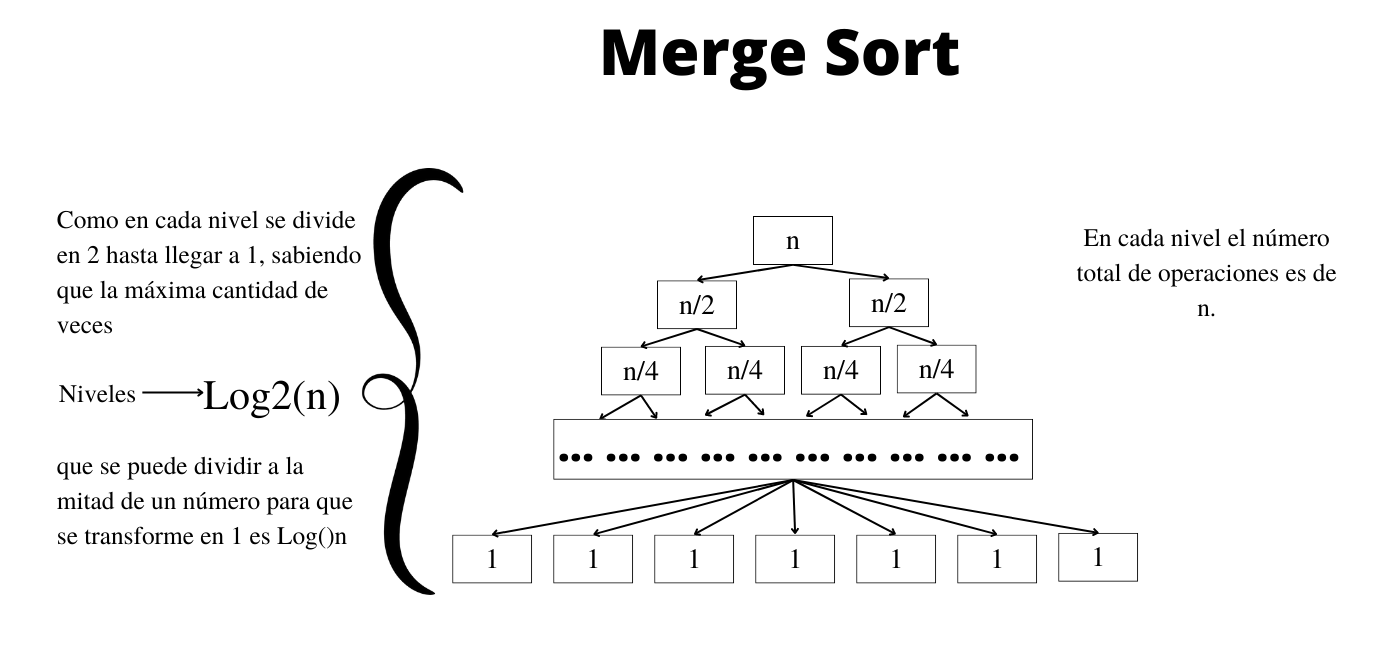

La función Merge Sort se llama recursivamente para ordenar subarreglos de la mitad del arreglo recibido. Como se puede evidenciar en el árbol de recurrencia, este procesos se realiza hasta que queden **n** sub operaciones simples.

Sabemos que un número **n**$>$1 solo puede dividirse para transformarlo en su mitad $n = \frac{n}{2}$ la cantidad de log_2(**n**) antes de transformarse en $n=1$. Por eso el árbol de recurrencia de Merge Sort siempre tendra $log_2(n)$ de altura.

Como sabemos que son $log_2(n)$ y en cada nivel habra $n$ operaciones en total, y esto siempre ocurrira en el Merge Sort, entonces, la cantidad total de operaciones es de $n*log_2(n)$.

Debido a que la cantidad de operaciones dicta el tiempo de ejecucion de un algoritmo, entonces sabesmos que el tiempo de ejecucion del **Merge Sort** es de $n*log_2(n)$ y el algoritmo es de orden $O(n*log_2(n))$.

### **Prueba del teorema.** (Código)

Observando el código actuando sobre distintas secuencias numéricas, independiente del orden en que se encuentre, el algoritmo **Merge Sort** realizara la misma cantidad de llamadas y comparaciones si la cantidad de números en la secuencia es la misma.

In [43]:
import random
llamadas = 0; contador = 0; pasada = 0; llamadasMerge = 0
array = random.sample(range(1, 100), 5)
print("Datos de entrada: ",array)
MergeSort(array, 0, len(array))
print(f"\nDatos de salida: {array}")
print("Numero de llamadas de la funcion Merge Sort: ", llamadas)
print("Numero de comparaciones de la funcion Merge: ", contador)
print("Numero de llamadas de la funcion Merge: ", llamadasMerge)

Datos de entrada:  [51, 3, 43, 72, 96]

Datos de salida: [3, 43, 51, 72, 96]
Numero de llamadas de la funcion Merge Sort:  11
Numero de comparaciones de la funcion Merge:  14
Numero de llamadas de la funcion Merge:  5


In [44]:
llamadas = 0; contador = 0; pasada = 0; llamadasMerge = 0
array = random.sample(range(1, 100), 5)
print("Datos de entrada: ",array)
MergeSort(array, 0, len(array))
print(f"\nDatos de salida: {array}")
print("Numero de llamadas de la funcion Merge Sort: ", llamadas)
print("Numero de comparaciones de la funcion Merge: ", contador)
print("Numero de llamadas de la funcion Merge: ", llamadasMerge)

Datos de entrada:  [88, 80, 44, 75, 22]

Datos de salida: [22, 44, 75, 80, 88]
Numero de llamadas de la funcion Merge Sort:  11
Numero de comparaciones de la funcion Merge:  14
Numero de llamadas de la funcion Merge:  5


En estos casos, pese a ser 2 secuencias de 5 números, con distintos elementos y en distinto orden, el algoritmo cumplió su función, además `Numero de comparaciones en Merge`, `Numero de llamadas de la función Merge Sort` y `Numero de llamadas de la función Merge` tienen la misma magnitud en ambos ejemplos.

Esto se debe a que independientemente del algoritmo que reciba Merge Sort, los pasos que realiza para ordenarlo son los mismos, siempre dividirá al algoritmo para ir armándolo de forma ordenada poco a poco, incluso si el algoritmo se encuentra ya ordenado.

Posdata: Los códigos de ejemplo anteriormente usados, generan secuencias de 5 elementos con elementos al azar, para probar que todas las secuencias reciben las mismas llamadas y comparaciones si contienen la misma cantidad de elementos.

# **5. Experimentos**

## **5.1. Número de comparaciones** (Experimental)

### Para tamaños de problemas con $n \in [4,100]$.

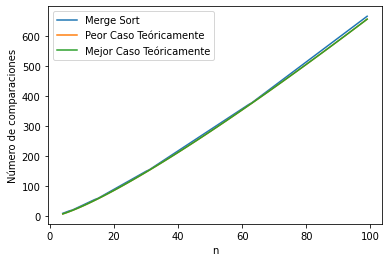

In [ ]:
import matplotlib.pyplot as plt
import math
import random

x=[n for n in range(4,100)] 
y1=[(n * math.log2(n)) for n in range(4,100)] # worst case
y2=[(n * math.log2(n)) for n in range(4,100)] # best case
y=[]; 

for n in range(4,100):
    a = random.sample(range(1, 100), n)
    llamadas = 0; contador = 0; pasada = 0; llamadasMerge = 0
    MergeSort(a, 0, len(a))
    y.append(contador)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Merge Sort", "Peor Caso Teóricamente", "Mejor Caso Teóricamente"])

## Nombre de los ejes
plt.xlabel('n')
plt.ylabel('Número de comparaciones')

# Mostrar Gráfico
plt.show()

### **Análisis de resultados**

En el gráfico se puede apreciar que, como cabía de esperar, el tiempo de ejecución empírico del **Merge Sort** es el mismo que en su peor y mejor caso, es decir, $O(n*log(n))$. 

Esto se debe a que su proceso no se ve afectado por nada más que la cantidad de elementos. No hay caso en que trabaje más o menos dentro de secuencias con una misma cantidad de elementos.

## **5.2. Tiempo de ejecución** (Experimental)

### **Merge Sort** (Tiempo de ejecución)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **Merge Sort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $[5,100[$ , $[5,600[$ y $[5,1000[$.

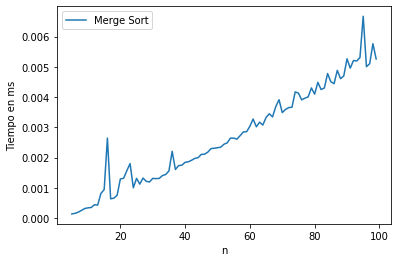

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,100):
    a = random.sample(range(1, 1000), n)

    #la función repeat está ejecutando 10 veces MergeSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{1},{len(a)})", repeat=1, number=10)

    x.append(n)
    y.append(t)


plt.plot(x,y)
plt.legend(["Merge Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

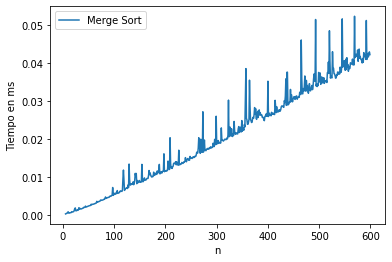

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,600):
    a = random.sample(range(1, 1000), n)

    #la función repeat está ejecutando 10 veces MergeSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{1},{len(a)})", repeat=1, number=10)

    x.append(n)
    y.append(t)


plt.plot(x,y)
plt.legend(["Merge Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

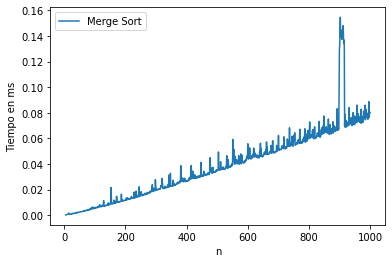

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,1000):
    a = random.sample(range(1, 1000), n)

    #la función repeat está ejecutando 10 veces MergeSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{1},{len(a)})", repeat=1, number=10)

    x.append(n)
    y.append(t)


plt.plot(x,y)
plt.legend(["Merge Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

#### **Análisis de resultados**

En el gráfico se puede apreciar que el tiempo de ejecución se comporta de manera $n*log(n)$ en función del tamaño del problema (al igual que en el análisis teórico).

Note que hay unos peaks de tiempo. Estos se deben probablemente al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando.

### **Merge Sort vs Insertion Sort** (Tiempo de ejecución)

##### **Insertion Sort** (Codigo)

In [ ]:
def insertionSort(arr, verbose=False): 
    n = len(arr)
    cont = 0 #contador de comparaciones

    if verbose == True: print(f"Arreglo Inicial = {arr}\n")

    # Se recorre el arreglo
    for i in range(1,n):
        
        if verbose == True: print("Pasada ",i)

        aux = arr[i] # Se guarda el i-esimo elemento que podria cambiar de posicion
        j = i - 1

        cont += 1
        
        if verbose == True: 
          print(f"{arr}")
          print(f"Comparación: arr[{j+1}] < arr[{j}] ===> {aux} < {arr[j]}")
          if aux >= arr[j]: print("No hubo cambios")
          
        # Se compara dentro del arreglo
        while j > -1 and aux < arr[j] :# Si el elemento es menor al anterior elemento, se intercambian
            arr[j+1] = arr[j]
            j -= 1
            if j==-1: cont -=1
            if verbose == True: print(f"Arreglo después del cambio {arr}")
            if verbose == True and j!=-1: print(f"Comparación: aux < arr[{j}] ===> {aux} < {arr[j]}")
            cont+= 1
        
        arr[j+1] = aux
        if verbose == True: print(f"Al finalizar pasada: {arr}\n")
    
    if verbose == True:
      for i in range(0,n-1):
          if arr[i] > arr[i+1]: 
              print("\nEl arreglo no se ordenó correctamente")
              break
          if i == n-2: print("\nEl arreglo se ordenó correctamente")
      print(f"Arreglo Final = {arr}")
      

    return cont

# Ejemplo
array = [1,8,3,7,9]
print("Datos de entrada: ",array)
counter = insertionSort(array)
print("Datos de salida: ",array)
print("# comparaciones: ", counter)

Datos de entrada:  [1, 8, 3, 7, 9]
Datos de salida:  [1, 3, 7, 8, 9]
# comparaciones:  6


##### **Comparación** (Gráficas)

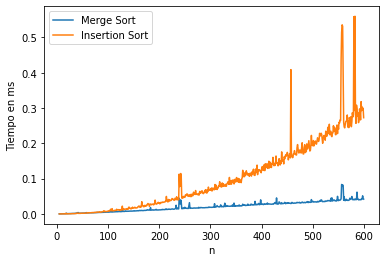

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,600):
    a = random.sample(range(1, 1000), n)

    #la función repeat está ejecutando 10 veces MergeSort e insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a},{1},{len(a)})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Merge Sort", "Insertion Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

##### **Análisis de resultados**

Al comparar los tiempos de ejecución de **Merge Sort** y **Insertion Sort**, podemos apreciar que el algoritmo de $Merge Sort$ es más rápido que el algoritmo $Insertion Sort$.

Pese a que el mejor caso de $Insertion Sort$ es más rápido que el mejor caso de $Merge Sort$. Y mientras más grande es la secuencia de números a ordenar, más notable es esta diferencia de velocidad.

Esto puede deberse a la forma en que operan estos algoritmos, $Insertion Sort$ siempre está más cerca de su peor caso $O(n^2)$, mientras que el caso del $MergeSort$ siempre es $O(n*log(n))$
